In [1]:
import pandas as pd
import numpy as np
from keras.layers import Input, LSTM, Concatenate, Dense
from keras.models import Model
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# data preparation
raw_data = pd.read_csv("/content/drive/My Drive/IHSG.csv")
#raw_data =raw_data[:50] # Juml row maksimal yang mau diambil sample 15 row

# memilih kolom open dan close saja
raw_data = raw_data[['Open', 'Close','High','Low','Adj Close']] # all = Tanggal,Open,High,Low,Close,Adj Close,Volume
raw_data.head()

,Open,Close,High,Low,Adj Close
0,6656.707031,6631.150879,6669.911133,6626.655762,6631.150879
1,6657.791992,6707.651855,6716.597168,6650.303223,6707.651855
2,6724.398926,6683.851074,6730.598145,6648.078125,6683.851074
3,6697.942871,6731.391113,6731.391113,6685.403809,6731.391113
4,6751.349121,6804.937012,6806.729980,6748.909180,6804.937012


In [3]:
data = raw_data[['Open']]
scaler = MinMaxScaler(feature_range=(0, 1))
open = scaler.fit_transform(data)

data = raw_data[['Close']]
scaler = MinMaxScaler(feature_range=(0, 1))
close = scaler.fit_transform(data)

data = raw_data[['High']]
scaler = MinMaxScaler(feature_range=(0, 1))
high = scaler.fit_transform(data)

data = raw_data[['Low']]
scaler = MinMaxScaler(feature_range=(0, 1))
low = scaler.fit_transform(data)

data = raw_data[['Adj Close']]
scaler = MinMaxScaler(feature_range=(0, 1))
adj = scaler.fit_transform(data)



In [4]:
# membuat dataset dengan 90% data training dan 10% data testing
train_size = int(len(raw_data) * 0.9) #226 total 252
#train_size = int(2) #226 total 252

#Dataset training data 90%
train_data1 = open[:train_size] # 90% = 226 -252 = 26  /Train 90%
original_array=np.array(train_data1) #trainX & trainY
open = original_array.ravel()   

#Dataset training data 90%
train_data1 = close[:train_size] # 90% = 226 -252 = 26  /Train 90%
original_array=np.array(train_data1) #trainX & trainY
close = original_array.ravel()   

#Dataset training data 90%
train_data1 = high[:train_size] # 90% = 226 -252 = 26  /Train 90%
original_array=np.array(train_data1) #trainX & trainY
high = original_array.ravel()   

#Dataset training data 90%
train_data1 = low[:train_size] # 90% = 226 -252 = 26  /Train 90%
original_array=np.array(train_data1) #trainX & trainY
low = original_array.ravel()   

#Dataset training data 90%
train_data1 = adj[:train_size] # 90% = 226 -252 = 26  /Train 90%
original_array=np.array(train_data1) #trainX & trainY
adj = original_array.ravel()   

#Dataset test data 10%
#test_data = close[train_size:] # 90% = 226 -252 = 26  /Train 90%
#original_array1=np.array(test_data) #trainX & trainY
#open_test = original_array1.ravel()   


#reshape data ke 3D
open_data = open.reshape((len(open), 1,1))
close_data = close.reshape((len(close),1, 1))
high_data = high.reshape((len(high), 1,1))
low_data = low.reshape((len(low), 1,1))
volume_data = adj.reshape((len(adj),1, 1))

#Data untuk compare hasil training dan sebelum training
open_data_sblum_training = open_data

In [5]:
#input layer / Setting variable jadi 3 dimensi
open_in = Input(shape=(1,1))
close_in = Input(shape=(1,1))
high_in = Input(shape=(1,1))
low_in = Input(shape=(1,1))
volume_in = Input(shape=(1,1))

#LSTM layer
open_lstm = LSTM(50)(open_in)
close_lstm = LSTM(50)(close_in)
high_lstm = LSTM(50)(high_in)
low_lstm = LSTM(50)(low_in)
volume_lstm = LSTM(50)(volume_in)

In [ ]:
#concatenate layer
merged = Concatenate()([open_lstm, close_lstm, high_lstm, low_lstm, volume_lstm])

#output layer
output = Dense(1)(merged)

#model
model = Model([open_in, close_in, high_in, low_in, volume_in], output)
model.compile(loss='mean_absolute_error', optimizer='adam')

#fit model
model.fit([open_data, close_data, high_data, low_data, volume_data], open_data, epochs=100, batch_size=32)
#model.fit([open_data, close_data, high_data, low_data, volume_data], open_data, epochs=10, batch_size=16)
#model.fit([open_data, close_data, high_data, low_data, volume_data], data['Next_Close'], epochs=5, batch_size=32) # buatkan datanya

1/1 [==============================] - 2s 2s/step - loss: 0.0026
Absolute Mean Error:  0.002617035061120987


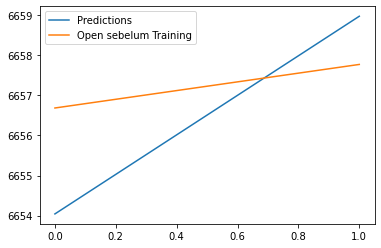

In [7]:
#predict data dari hasil training
predictions = model.predict([open_data, close_data, high_data, low_data, volume_data])

#evaluate
error = model.evaluate([open_data, close_data, high_data, low_data, volume_data], open_data)   #error = model.evaluate([open_data, close_data, high_data, low_data, volume_data], data['Close'])
print("Absolute Mean Error: ", error)
#train_data1=train_data

# inverting data kembali ke nilai asli
predictions = scaler.inverse_transform(predictions) #2D
train_data= open_data_sblum_training.reshape(-1, 1) #ubah ke 2D
open_data_sblum_training   = scaler.inverse_transform(train_data) # cuma sekali presiksi saja karean bisa ke scaller 2 x

#test_data   = scaler.inverse_transform(test_data)
#testPredict = scaler.inverse_transform(testPredict)                       
#testY = scaler.inverse_transform(testY)     

#plot
plt.plot(predictions, label='Predictions')
#plt.plot(data['Next_Close'], label='Actual')
#plt.plot(new_array1, label='Actual') # buatkan datanya
plt.plot(open_data_sblum_training, label='Open sebelum Training') # buatkan datanya

plt.legend()
plt.show()

8/8 [==============================] - 0s 4ms/step - loss: 0.3944
Absolute Mean Error:  0.39439088106155396


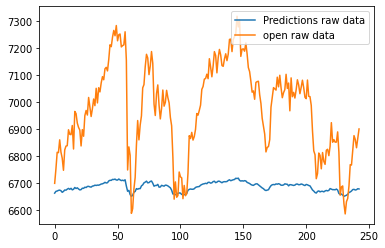

In [8]:

#predict data dari BUKAN hasil training
# membuat dataset dengan 90% data training dan 10% data testing
train_size = int(1 * 0.1) #226 total 252 # sudah di atas

data = raw_data[['Open']]
scaler = MinMaxScaler(feature_range=(0, 1))
open = scaler.fit_transform(data)

data = raw_data[['Close']]
scaler = MinMaxScaler(feature_range=(0, 1))
close = scaler.fit_transform(data)

data = raw_data[['High']]
scaler = MinMaxScaler(feature_range=(0, 1))
high = scaler.fit_transform(data)

data = raw_data[['Low']]
scaler = MinMaxScaler(feature_range=(0, 1))
low = scaler.fit_transform(data)

data = raw_data[['Adj Close']]
scaler = MinMaxScaler(feature_range=(0, 1))
adj = scaler.fit_transform(data)


#Dataset training data 10%
train_data = open[train_size:] # 90% = 226 -252 = 26  /Train 90%
original_array=np.array(train_data) #trainX & trainY
open = original_array.ravel()   

#Dataset training data 10%
train_data = close[train_size:] # 90% = 226 -252 = 26  /Train 90%
original_array=np.array(train_data) #trainX & trainY
close = original_array.ravel()   

#Dataset training data 10%
train_data = high[train_size:] # 90% = 226 -252 = 26  /Train 90%
original_array=np.array(train_data) #trainX & trainY
high = original_array.ravel()   

#Dataset training data 10%
train_data = low[train_size:] # 90% = 226 -252 = 26  /Train 90%
original_array=np.array(train_data) #trainX & trainY
low = original_array.ravel()   

#Dataset training data 10%
train_data = adj[train_size:] # 90% = 226 -252 = 26  /Train 90%
original_array=np.array(train_data) #trainX & trainY
adj = original_array.ravel()   


#reshape data ke 3D
open_data_aktual = open.reshape((len(open), 1,1))
close_data_aktual = close.reshape((len(close),1, 1))
high_data_aktual = high.reshape((len(high), 1,1))
low_data_aktual = low.reshape((len(low), 1,1))
volume_data_aktual = adj.reshape((len(adj),1, 1))

#Predict data belum pernah training 
#model.compile(loss='mean_absolute_error', optimizer='adam')
predictions = model.predict([open_data_aktual, close_data_aktual, high_data_aktual, low_data_aktual, volume_data_aktual])

#evaluate
error = model.evaluate([open_data_aktual, close_data_aktual, high_data_aktual, low_data_aktual, volume_data_aktual], open_data_aktual)   #error = model.evaluate([open_data, close_data, high_data, low_data, volume_data], data['Close'])
print("Absolute Mean Error: ", error)
#train_data1=train_data

# inverting data kembali ke nilai asli
predictions = scaler.inverse_transform(predictions) #2D

#percobaan pembanding
a   =open.reshape(-1, 1) #ubah ke 2D
open   = scaler.inverse_transform(a) # cuma sekali presiksi saja karean bisa ke scaller 2 x

b   =close.reshape(-1, 1) #ubah ke 2D
close   = scaler.inverse_transform(b) # cuma sekali presiksi saja karean bisa ke scaller 2 x

c   =high.reshape(-1, 1) #ubah ke 2D
high   = scaler.inverse_transform(c) # cuma sekali presiksi saja karean bisa ke scaller 2 x

d   =low.reshape(-1, 1) #ubah ke 2D
low   = scaler.inverse_transform(d) # cuma sekali presiksi saja karean bisa ke scaller 2 x

e   =adj.reshape(-1, 1) #ubah ke 2D
adi   = scaler.inverse_transform(e) # cuma sekali presiksi saja karean bisa ke scaller 2 x

f   =adj.reshape(-1, 1) #ubah ke 2D
adj   = scaler.inverse_transform(f) # cuma sekali presiksi saja karean bisa ke scaller 2 x



#test_data   = scaler.inverse_transform(test_data)
#testPredict = scaler.inverse_transform(testPredict)                       
#testY = scaler.inverse_transform(testY)     

#plot
plt.plot(predictions, label='Predictions raw data')
plt.plot(open, label='open raw data')
#plt.plot(close, label='close raw data')
#plt.plot(high, label='high raw data')
#plt.plot(low, label='low raw data')
#plt.plot(adj, label='adj/volume raw data')

plt.legend()
plt.show()